In [47]:
# @Author Euclidi Filippo - matr. 294517

#Importing all needed libraries.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Setting train and test set by importing the datasets
df_train = pd.read_csv("./archive/train.csv")
df_test = pd.read_csv("./archive/test.csv")

In [49]:
# Checking if any of the values in our dataframe are null

check_any_NaN_Test = df_test.isnull().values.any()
check_any_NaN_Train = df_train.isnull().values.any()
print("Any NaN values in the train dataframe: " + str(check_any_NaN_Train) + 
      " and in the test dataframe: " + str(check_any_NaN_Test))

Any NaN values in the train dataframe: False and in the test dataframe: False


In [50]:
# As there are no null or NaN values we can be very happy
# Lets now visualize the first 5 rows of our database to have a look at the
# columns and the type of data contained in them

print(df_train.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [51]:
# Lets do the same for the test set

print(df_test.head())

   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

In [52]:
# Now lets see the shape of our dataset to understan the numbers we are working with

print(df_train.shape)
print(df_test.shape)

(2000, 21)
(1000, 21)


In [53]:
# As we can see al data is numerical, and most of it is quantitative.
# Let's see some statistics of some of these columns

# First lets see the number of phones for each price rance
print(df_train['price_range'].value_counts())


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [54]:
# We can confidently say that our dataset is perfectly balanced
# Lets do some basic statistical analysis on the datasets, by using the function dataframe.describe()
print("Statistics for train dataframe\n")
print(df_train.describe())
print("Statistics for test dataframe\n")
print(df_test.describe())

Statistics for train dataframe

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.

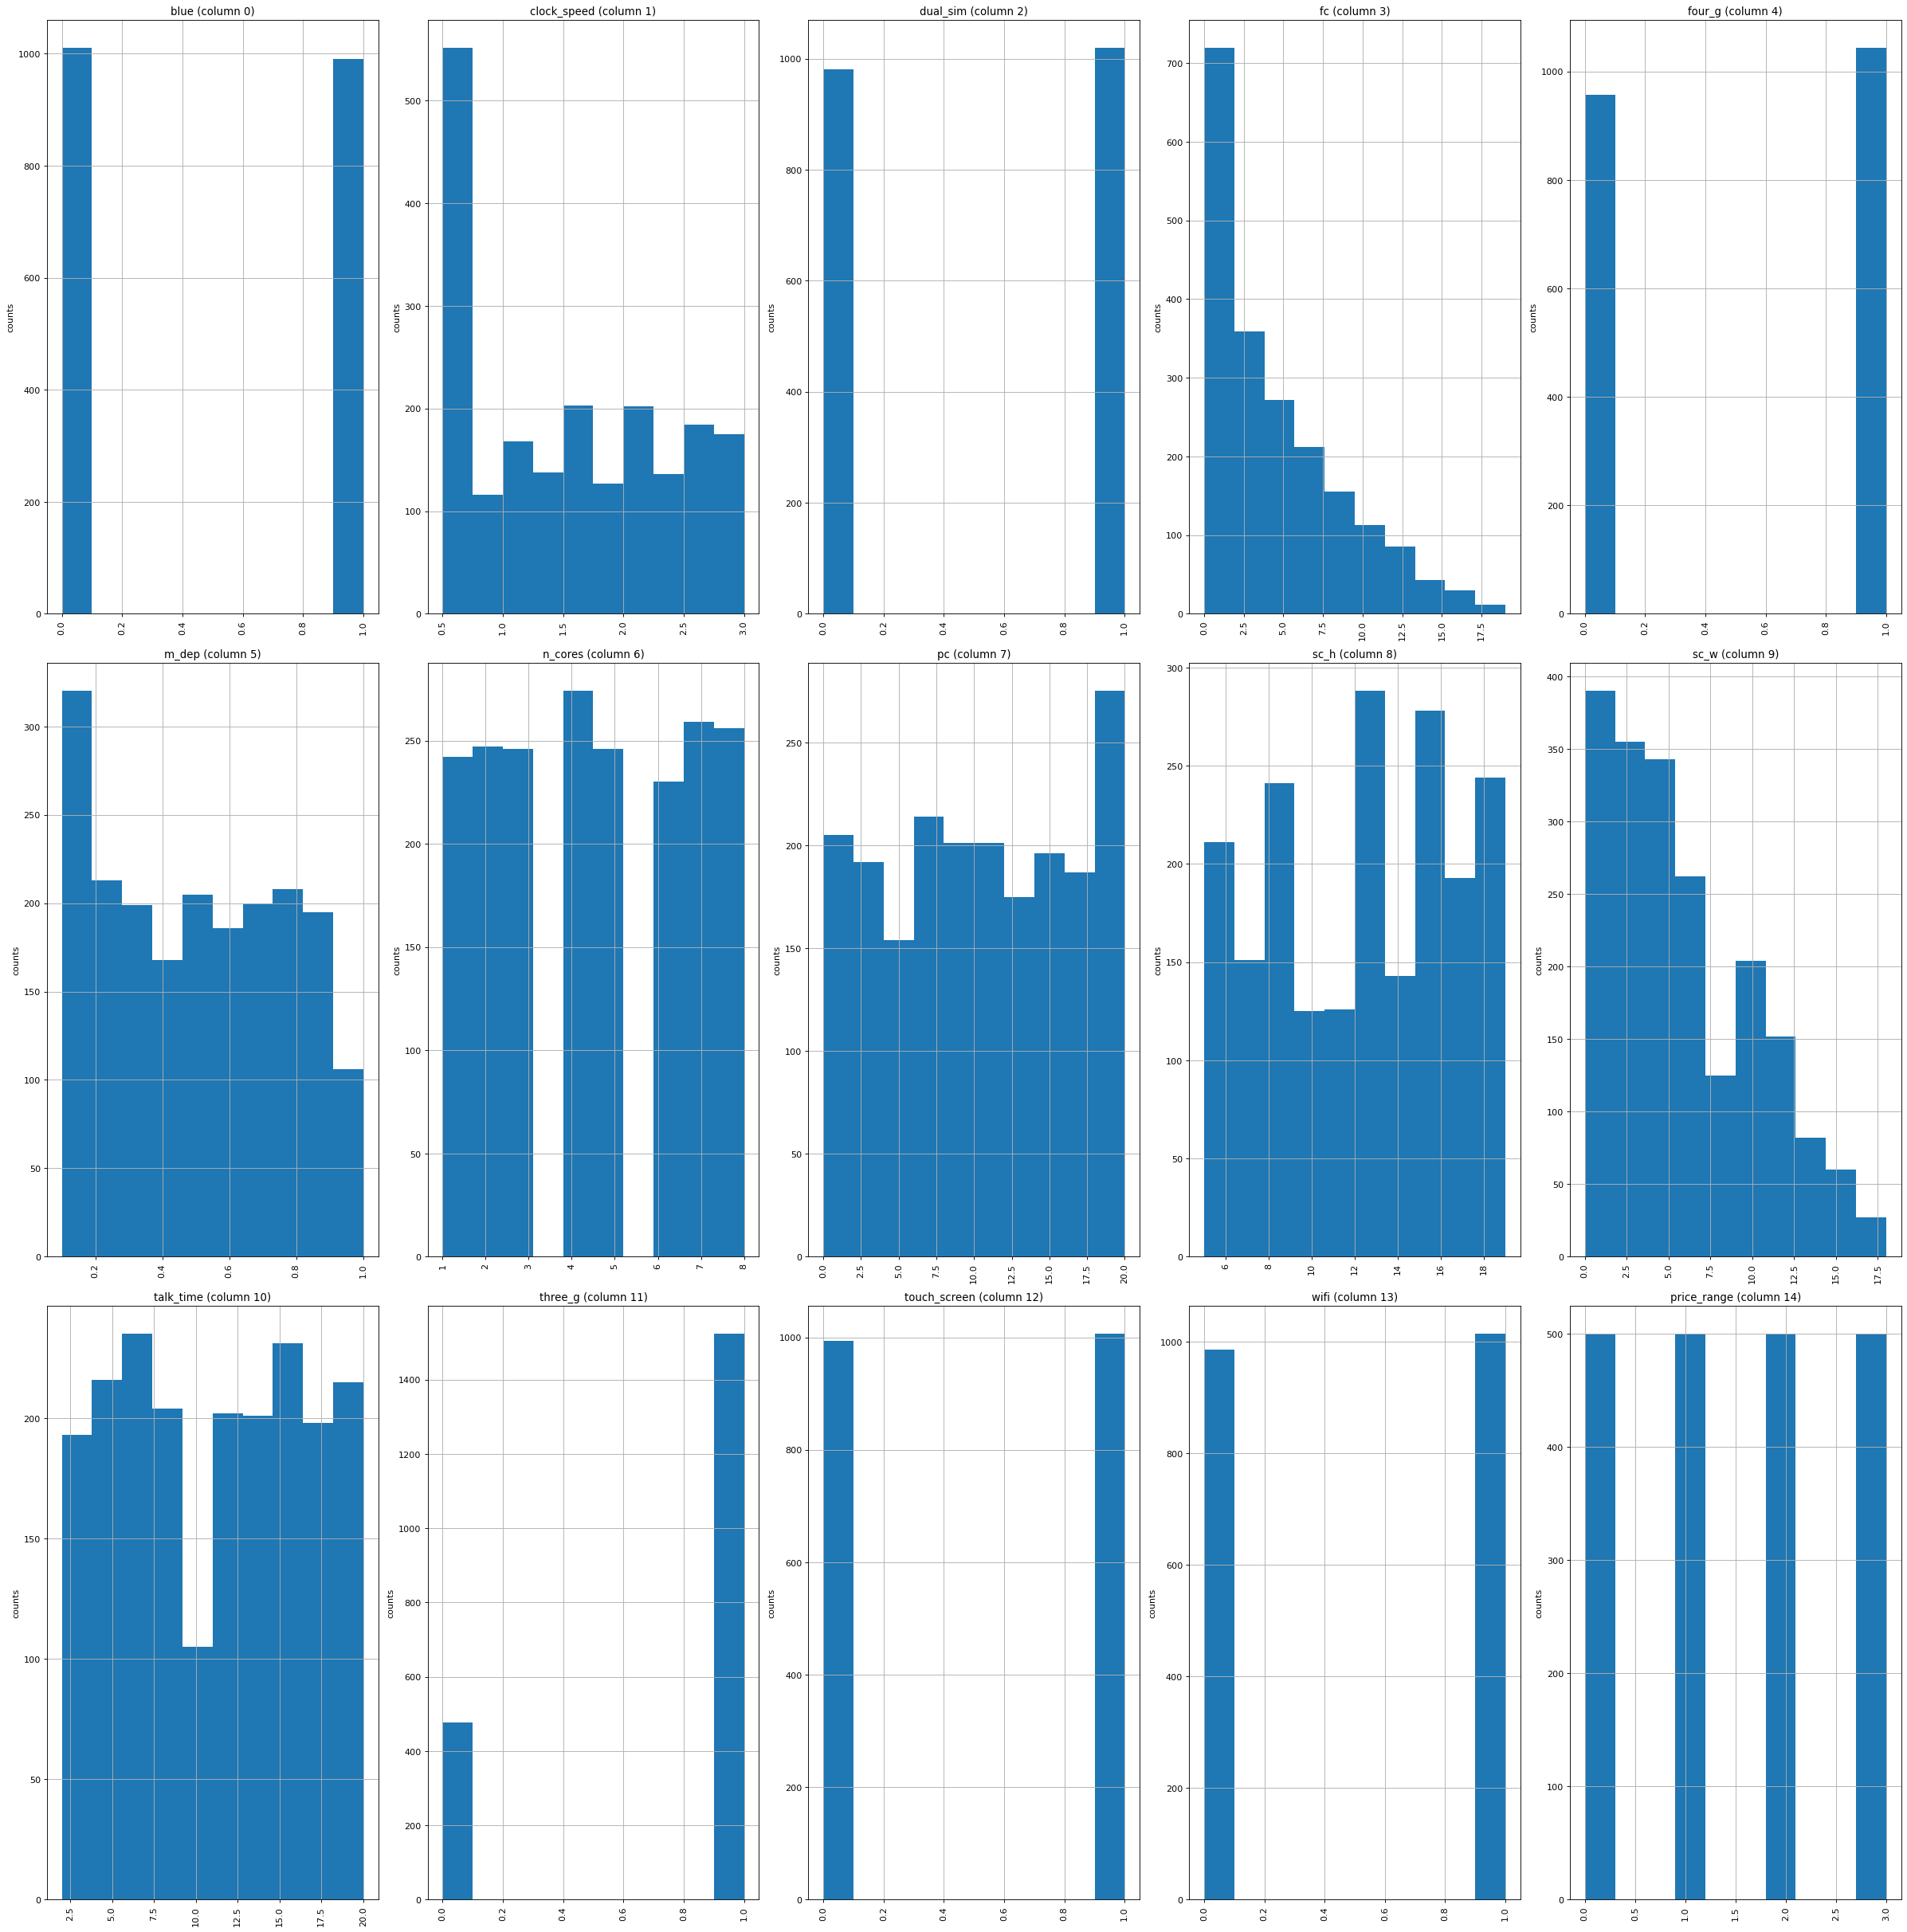

None


In [55]:
# Lets now create a function to visualize the data by plotting it in some histogram
# graphs and learn more about the data contained in each column.
# This function was inspired by an already existing function and was modified for my needs

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape #number of columns and rows to shape the hist.
    columnNames = list(df) #getting the labels for each column
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow #number of rows of the graph
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k') #creating the plot and it's design
    for i in range(min(nCol, nGraphShown)): 
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1) #casting to int for deprecation warning by matplotlib
        columnDf = df.iloc[:, i] 
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})') 
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
print(plotPerColumnDistribution(df_train, 20, 5))


In [56]:

df_train['screen_resolution'] = (df_train['px_height']*df_train['px_width'])

print(df_train.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  screen_resolut

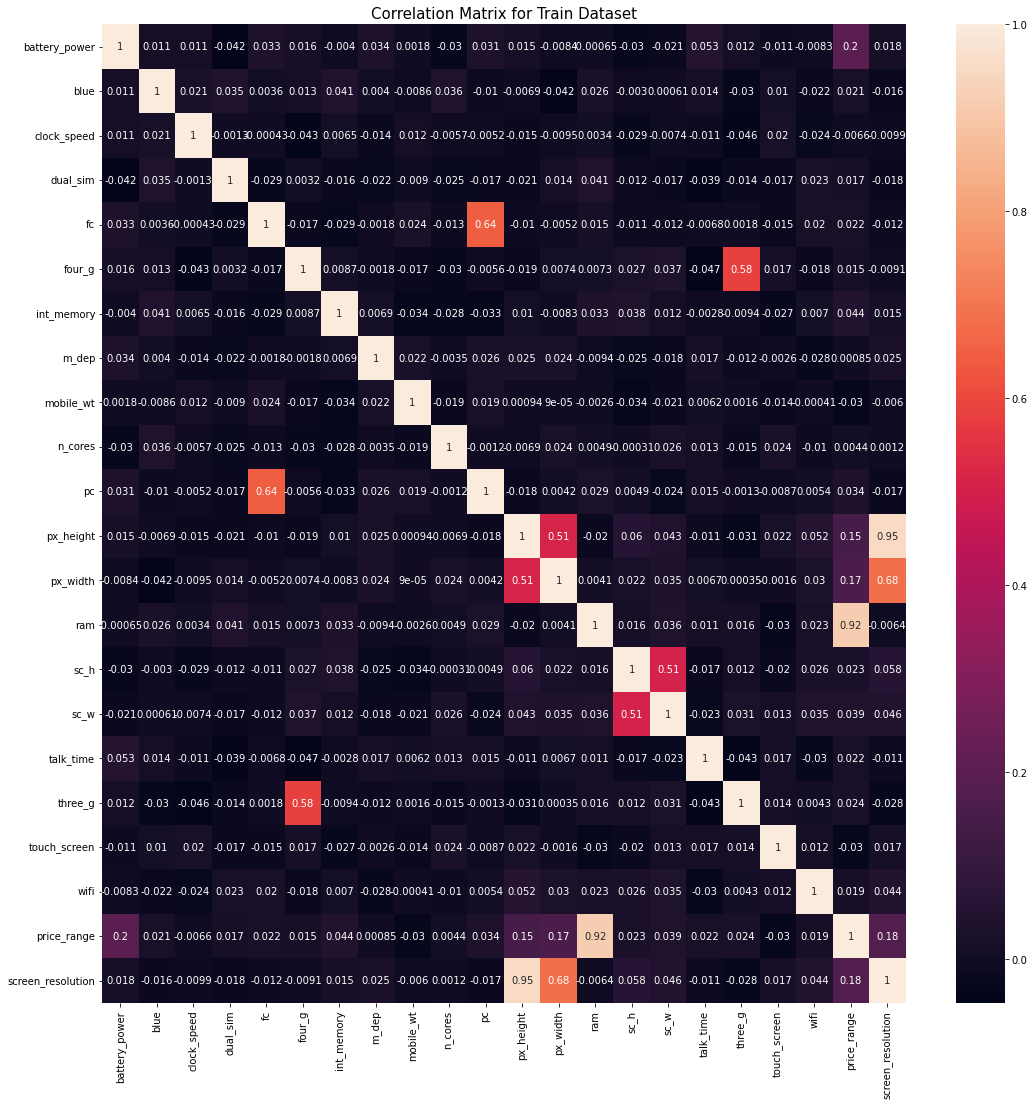

In [57]:
# As we can see some columns contain Y/N values for specific components of the
# phone, so we can say that these columns contain only categorical values.
# Specifically these are the bluetooth column, the dual sim column, the 4G column, 
# the 3G column, the Touch Screen column and the wifi column.
# Also the price range columns contains some categorical values.

# Now lets use the Pearson Correlation Matrix to visualize the correlation of 
# the data in the training dataset 

correlation_df_train = df_train.corr(method = 'pearson')
plt.figure(figsize=(18, 18), facecolor='w')
sns.heatmap(correlation_df_train, annot=True)
plt.title(f'Correlation Matrix for Train Dataset', fontsize=15)
plt.show()

Regplot for price range and ram


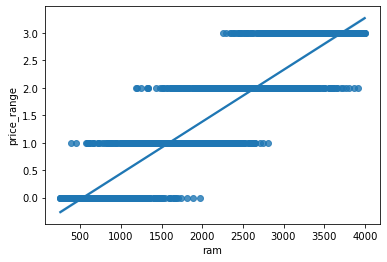

In [58]:
# As we can see both the training and test set are very similar and there is a good
# correlation between the price and the ram, some correlation between price and battery 
# power and a minor correlation between price and screen resolution (pixel in width and height)

# Lets see this correlation in a regplot with Seaborn

print("Regplot for price range and ram")
regplot1 = sns.regplot(x = "ram", y = "price_range", data=df_train)

Barplot for price range and screen resolution


<AxesSubplot:xlabel='price_range', ylabel='screen_resolution'>

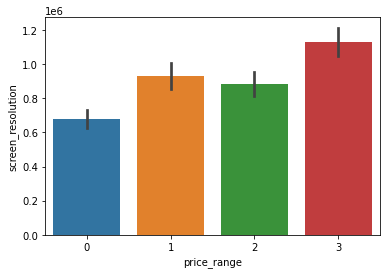

In [59]:
# There is a good correlation between ram and price range as shown in the regplot

print("Barplot for price range and screen resolution")
sns.barplot(y = "screen_resolution", x = "price_range", data=df_train)

Barplot for price range and battery power


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

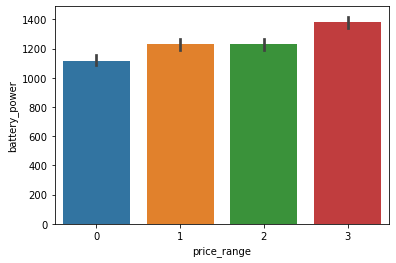

In [60]:
# There is a poor correlation between the screen resolution and price range, 
# especially between the medium and high range we can say that screen resolution isn't 
# correlated to the price

print("Barplot for price range and battery power")
sns.barplot(y = "battery_power", x = "price_range", data=df_train)

In [61]:
# It's possible to see that the correlation between ram and price range is actually effective
# and this will be one of the best variables, while the screen resolution is not as good
# some of the data could also be imprecise as some pixels resolutions are very uncommon
# we will still keep it as we cant be sure that those screens don't actually exist.

# We will now group all the categorical variables in a sub set (except for the price range)

categorical_var = ['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi'] 

In [62]:
# Also as 0, 1, 2 and 3 are not very meaningful we as price range, we can change them to a more
# meaningful low, medium, high, very high, which are the most used words to place a phone in a 
# specific price range, which will made our following analysis easier to understand.

df_train['price_range_qualitative'] = df_train['price_range'].replace(to_replace=[0,1,2,3],
                                    value=['low', 'medium', 'high', 'very high'])

print(df_train.head()) #lets visualize it to see if everything is correct

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  screen_resolution  price_range_qualitative  
0             0     1        

In [63]:
# We are now going to group the categorical variables by price range and see if 
# some of them are linked to the price somehow.
# If we see that there is some correlation between a phone not having (or having) a specific 
# component and it being in a lower (or higher) price category, then it means that the specific 
# variable could be in some way connected to the price range of that phone.

print(df_train.groupby([categorical_var[0]])['price_range_qualitative'].value_counts(normalize=True))
print(df_train.groupby([categorical_var[1]])['price_range_qualitative'].value_counts(normalize=True))
print(df_train.groupby([categorical_var[2]])['price_range_qualitative'].value_counts(normalize=True))
print(df_train.groupby([categorical_var[3]])['price_range_qualitative'].value_counts(normalize=True))
print(df_train.groupby([categorical_var[4]])['price_range_qualitative'].value_counts(normalize=True))
print(df_train.groupby([categorical_var[5]])['price_range_qualitative'].value_counts(normalize=True))


blue  price_range_qualitative
0     high                       0.254455
      low                        0.254455
      medium                     0.252475
      very high                  0.238614
1     very high                  0.261616
      medium                     0.247475
      high                       0.245455
      low                        0.245455
Name: price_range_qualitative, dtype: float64
dual_sim  price_range_qualitative
0         high                       0.255861
          low                        0.254842
          medium                     0.249745
          very high                  0.239551
1         very high                  0.260059
          medium                     0.250245
          low                        0.245339
          high                       0.244357
Name: price_range_qualitative, dtype: float64
three_g  price_range_qualitative
0        low                        0.266247
         medium                     0.255765
         very hig

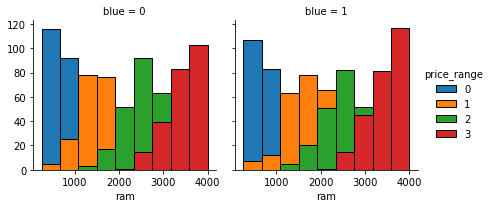

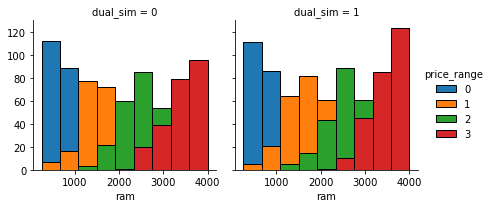

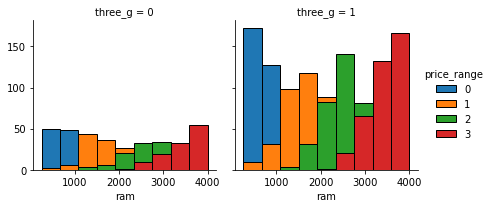

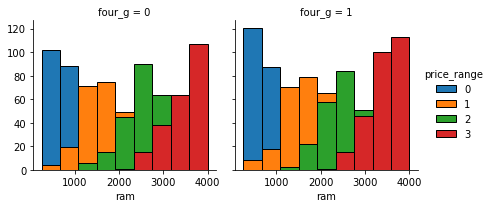

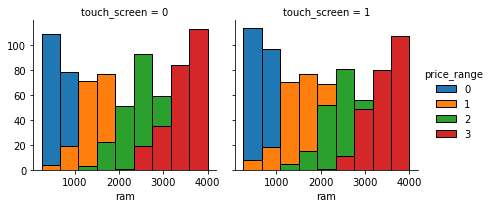

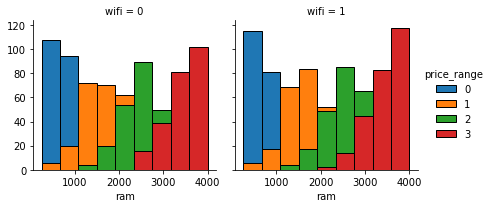

In [64]:
# To see the correlation more clearly, let's put everything in some Facetgrid graphs, as x 
# axis we are going to use the ram as we have seen that it shows a good correlation to the price
# and on the y axis we will use the selected categorical value, for the hue we will use 
# the price range

bins_size = np.linspace(df_train.ram.min(), df_train.ram.max(), 10)
b = sns.FacetGrid(df_train, hue = "price_range", col = "blue")
b.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
b.add_legend()

s = sns.FacetGrid(df_train, hue = "price_range", col = "dual_sim")
s.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
s.add_legend()

g3 = sns.FacetGrid(df_train, hue = "price_range", col = "three_g")
g3.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
g3.add_legend()

g4 = sns.FacetGrid(df_train, hue = "price_range", col = "four_g")
g4.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
g4.add_legend()

ts = sns.FacetGrid(df_train, hue = "price_range", col = "touch_screen")
ts.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
ts.add_legend()

w = sns.FacetGrid(df_train, hue = "price_range", col = "wifi")
w.map(plt.hist, 'ram', bins = bins_size, ec = 'k')
w.add_legend()

plt.show()



In [65]:
# As we can see only the 3G has a good correlation to the price range while all
# the others have mixed results which show no statistical correlation

# We have now finished the part of data analysis and data visualization
# and we will now pass to the pre-processing and the machine learning model implementation